In [16]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import bentoml
import pandas as pd

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

labels = open('labels.txt').read().split()
spectrogram = pd.read_csv(r"C:\Users\Kidma\source\repos\deployingmodel\test_spectr.csv", index_col=0).to_numpy()

spectrogram = np.expand_dims(spectrogram, 2)
np.save('spectrogram_test', spectrogram)
spectrogram.shape

(124, 129, 1)

In [17]:
model_keras = tf.keras.models.load_model('audio_commands_model_keras')
# model_bento = bentoml.keras.get('audio_commands_model_bento:latest').to_runner()

In [18]:
input = np.expand_dims(spectrogram, axis=0)
output = model_keras(input)
output

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[  0.10812601,  -1.8951931 ,   1.7778767 ,  -4.502115  ,
        -17.3776    ,  22.90076   ,   2.0067415 ,  -3.9159763 ]],
      dtype=float32)>

In [19]:
tf.nn.softmax(output[0])

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([1.2626541e-10, 1.7031546e-11, 6.7057554e-10, 1.2562677e-12,
       3.2161121e-18, 1.0000000e+00, 8.4302870e-10, 2.2575607e-12],
      dtype=float32)>

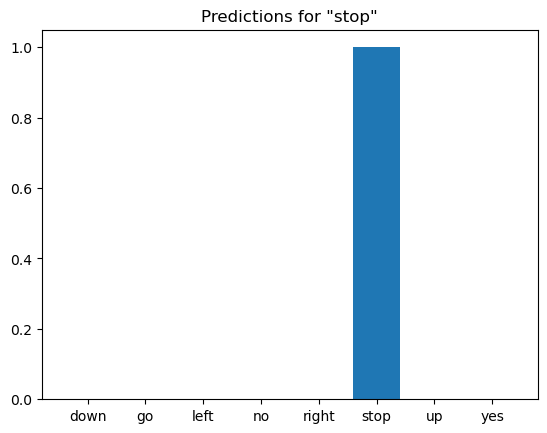

In [20]:
plt.bar(labels, tf.nn.softmax(output[0]))
plt.title(f'Predictions for "{labels[tf.argmax(output[0])]}"')
plt.show()

In [15]:
! pipreqsnb --force --ignore .history,__pycache__ C:\Users\Kidma\source\repos\deployingmodel

pipreqs  --force --ignore .history,__pycache__ C:\Users\Kidma\source\repos\deployingmodel


Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in C:\Users\Kidma\source\repos\deployingmodel\requirements.txt
